#About Data


In [134]:
import numpy as np
import pandas as pd
import chardet
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [135]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:

with open('/content/drive/MyDrive/Colab Notebooks/SeoulBikeData.csv', 'rb') as f:
    result = chardet.detect(f.read())

    # or readline if the file is large
#first failed to read the initial encoding, this code helped from stackoverflow https://stackoverflow.com/questions/33819557/unicodedecodeerror-utf-8-codec-while-reading-a-csv-file

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SeoulBikeData.csv', encoding=result['encoding'])

In [137]:
print(f' The shape of dataset is {(df.shape)} \n Total Rows are : {(df.shape)[0]}\n Total Columns are : {(df.shape)[1]}')

 The shape of dataset is (8760, 14) 
 Total Rows are : 8760
 Total Columns are : 14


In [138]:
# Check the info of dataset to know the data types of columns or variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Analyze patterns or trends


In [139]:
# Check for missing values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [140]:
# Check data types
df.dtypes


Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [141]:
# Rename columns to words that will be easy to call
df = df.rename(columns={
    'Date': 'date',
    'Rented Bike Count': 'count',
    'Hour': 'hour',
    'Temperature(°C)': 'temperature',
    'Humidity(%)': 'humidity',
    'Wind speed (m/s)': 'wind_speed',
    'Visibility (10m)': 'visibility',
    'Dew point temperature(°C)': 'dew_point_temperature',
    'Solar Radiation (MJ/m2)': 'solar_radiation',
    'Rainfall(mm)': 'rainfall',
    'Snowfall (cm)': 'snowfall',
    'Seasons': 'season',
    'Holiday': 'holiday',
    'Functioning Day': 'workingday'
})

print(df.columns)


Index(['date', 'count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall',
       'snowfall', 'season', 'holiday', 'workingday'],
      dtype='object')


In [142]:
#Get distinct categories counts forSeasons categories
df['season'].value_counts()

season
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [143]:
# Step 1: Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Step 2: Extract the day, month, and year into new columns
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year

# Verify the new columns
print(df[['date', 'day', 'month', 'month_name','year']].head())


        date  day  month month_name  year
0 2017-12-01    1     12   December  2017
1 2017-12-01    1     12   December  2017
2 2017-12-01    1     12   December  2017
3 2017-12-01    1     12   December  2017
4 2017-12-01    1     12   December  2017


In [144]:
df.head(2)

date  count  hour  temperature  humidity  wind_speed  visibility  \
0 2017-12-01    254     0         -5.2        37         2.2        2000   
1 2017-12-01    204     1         -5.5        38         0.8        2000   

   dew_point_temperature  solar_radiation  rainfall  snowfall  season  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   

      holiday workingday  day  month month_name  year  
0  No Holiday        Yes    1     12   December  2017  
1  No Holiday        Yes    1     12   December  2017

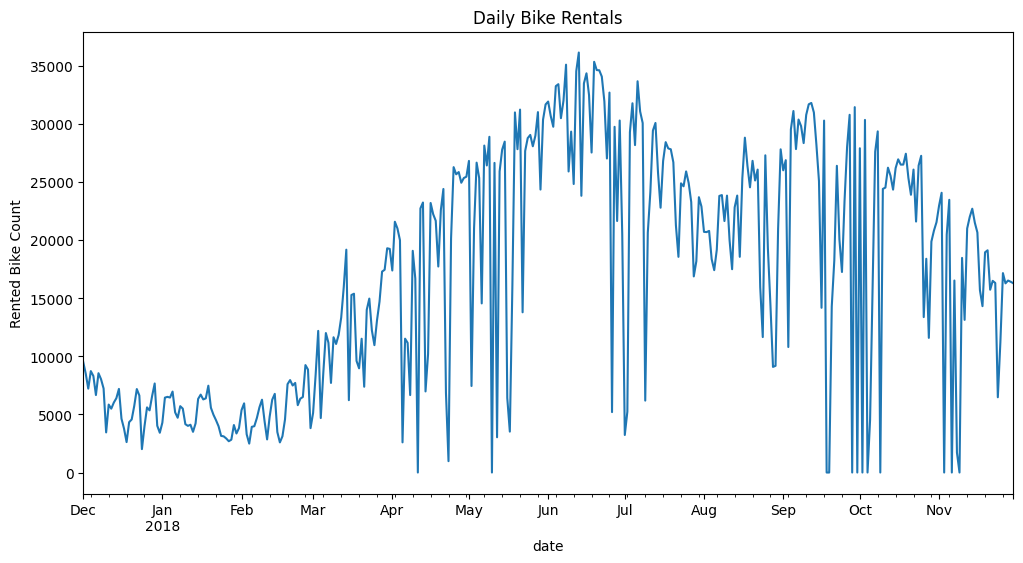

In [145]:
# Line plot for count trends from december 2017 to december 2018over time (daily or hourly trend)
plt.figure(figsize=(12, 6))
df.set_index('date').resample('D')['count'].sum().plot()
plt.title('Daily Bike Rentals')
plt.ylabel('Rented Bike Count')
plt.show()


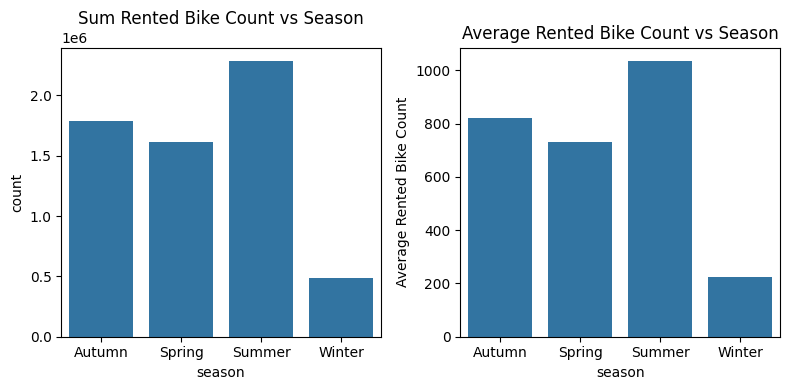

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sum and average rented bike count by season
# I want to plot both bar graphs next to each other side by side

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# sum
sum_count = df.groupby('season')['count'].sum()
sns.barplot(x=sum_count.index, y=sum_count.values, ax=axes[0])
axes[0].set_xlabel('season')
axes[0].set_ylabel('count')
axes[0].set_title('Sum Rented Bike Count vs Season')

# average
average_count = df.groupby('season')['count'].mean()
sns.barplot(x=average_count.index, y=average_count.values, ax=axes[1])
axes[1].set_xlabel('season')
axes[1].set_ylabel('Average Rented Bike Count')
axes[1].set_title('Average Rented Bike Count vs Season')

plt.tight_layout()
plt.show()

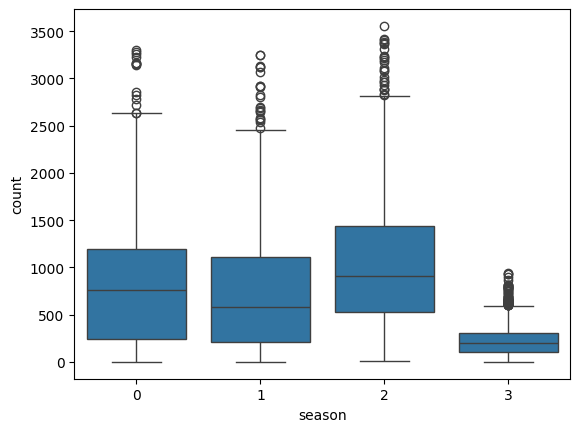

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

figsize=(8, 4)
sns.boxplot(x='season', y='count', data=data)
plt.show()

In [150]:
print(df.columns)

Index(['date', 'count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall',
       'snowfall', 'season', 'holiday', 'workingday', 'day', 'month',
       'month_name', 'year'],
      dtype='object')


In [151]:
print(df.dtypes)


date                     datetime64[ns]
count                             int64
hour                              int64
temperature                     float64
humidity                          int64
wind_speed                      float64
visibility                        int64
dew_point_temperature           float64
solar_radiation                 float64
rainfall                        float64
snowfall                        float64
season                           object
holiday                          object
workingday                       object
day                               int32
month                             int32
month_name                       object
year                              int32
dtype: object


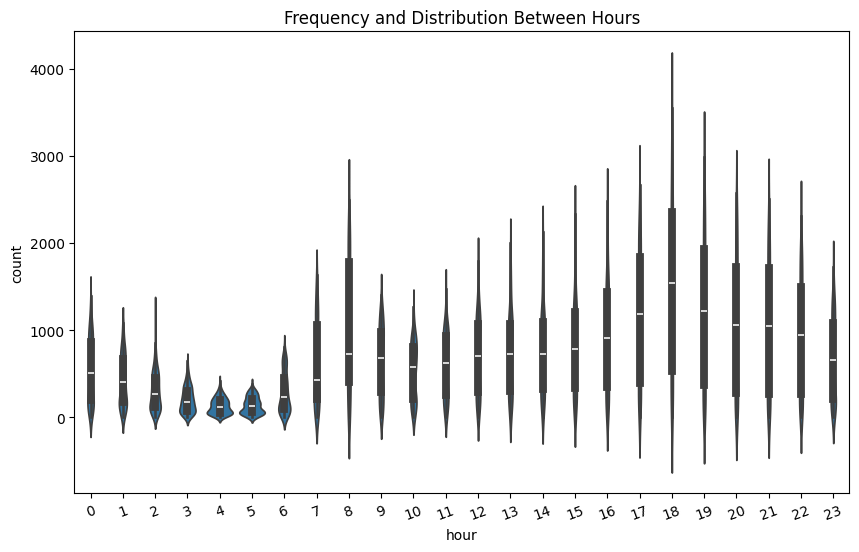

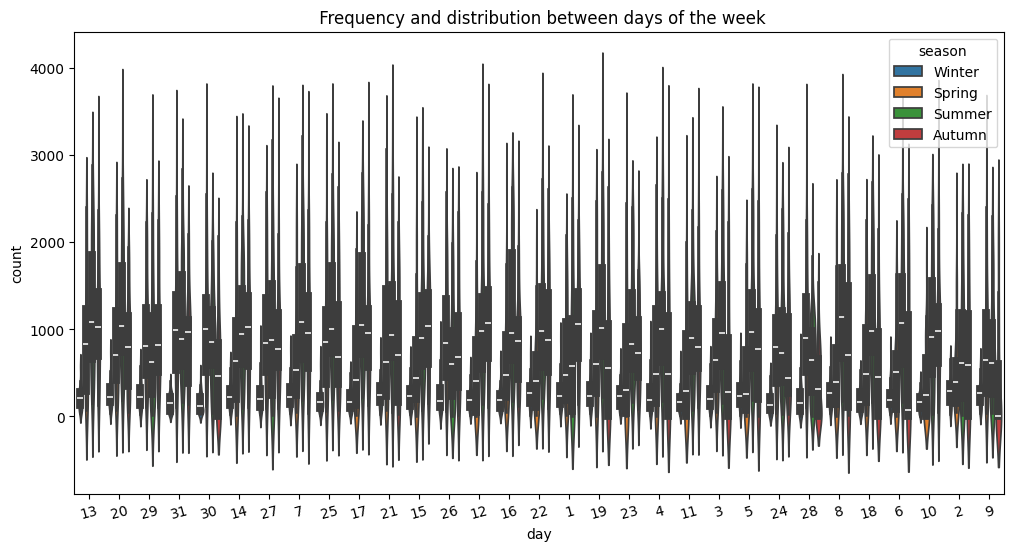

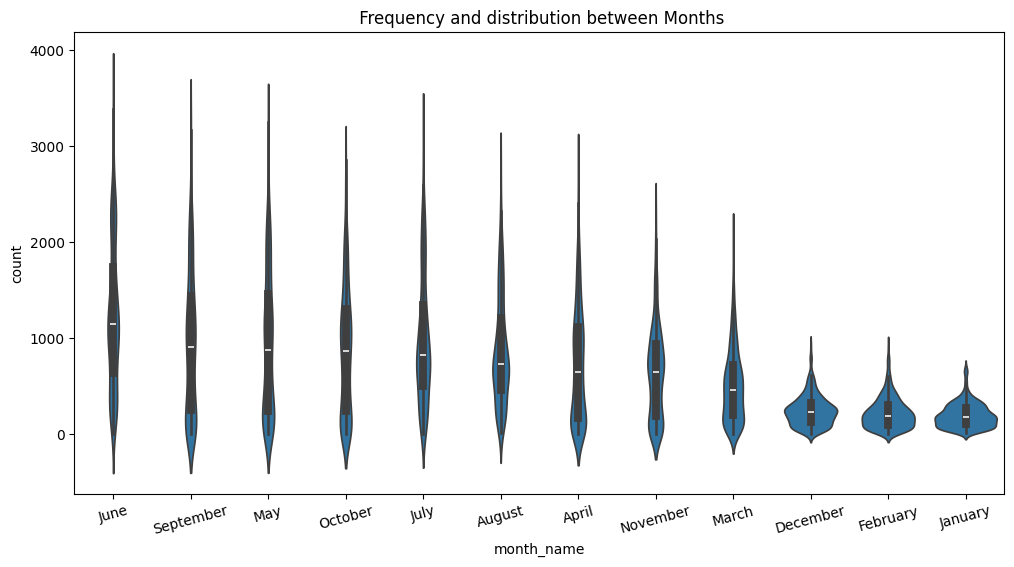

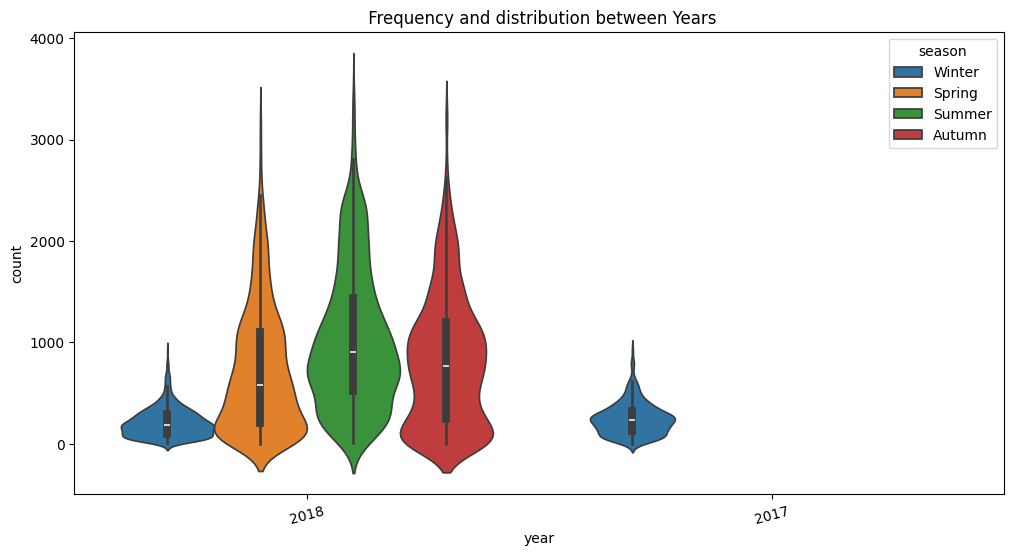

In [152]:
# @Hours, day, months distribution.
my_order = sorted(df['hour'].unique())  # Sorted unique values of hour
# Plot the violin plot
plt.figure(figsize=(10, 6))
plt.title('Frequency and Distribution Between Hours')
sns.violinplot(data=df, x='hour', y='count', order=my_order)  # Sorted hours
plt.xticks(rotation=20)
plt.show()

plt.figure(figsize=(12,6), dpi=100)
plt.title(' Frequency and distribution between days of the week')
my_order = df.groupby(by=["day"])["count"].median().sort_values().iloc[::-1].index
# Specifying the 'order' parameter with my_order and plotting
sns.violinplot(data=df, x='day', y='count', hue="season", order=my_order) # Comparing days
plt.xticks(rotation=15);
plt.show()

plt.figure(figsize=(12,6), dpi=100)
plt.title(' Frequency and distribution between Months')
my_order = df.groupby(by=["month_name"])["count"].median().sort_values().iloc[::-1].index
sns.violinplot(data=df, x='month_name', y='count', order=my_order) # Comparing Months
plt.xticks(rotation=15);
plt.show()

plt.figure(figsize=(12,6), dpi=100)
plt.title(' Frequency and distribution between Years')
my_order = df.groupby(by=["year"])["count"].median().sort_values().iloc[::-1].index
sns.violinplot(data=df, x='year', y='count',hue="season", order=my_order) # Comparing Years
plt.xticks(rotation=15);
plt.show()




##Weather

Started by analysing how weather conditions influence each other.
The heatmap shows the correlation between weather conditions in the dataset.

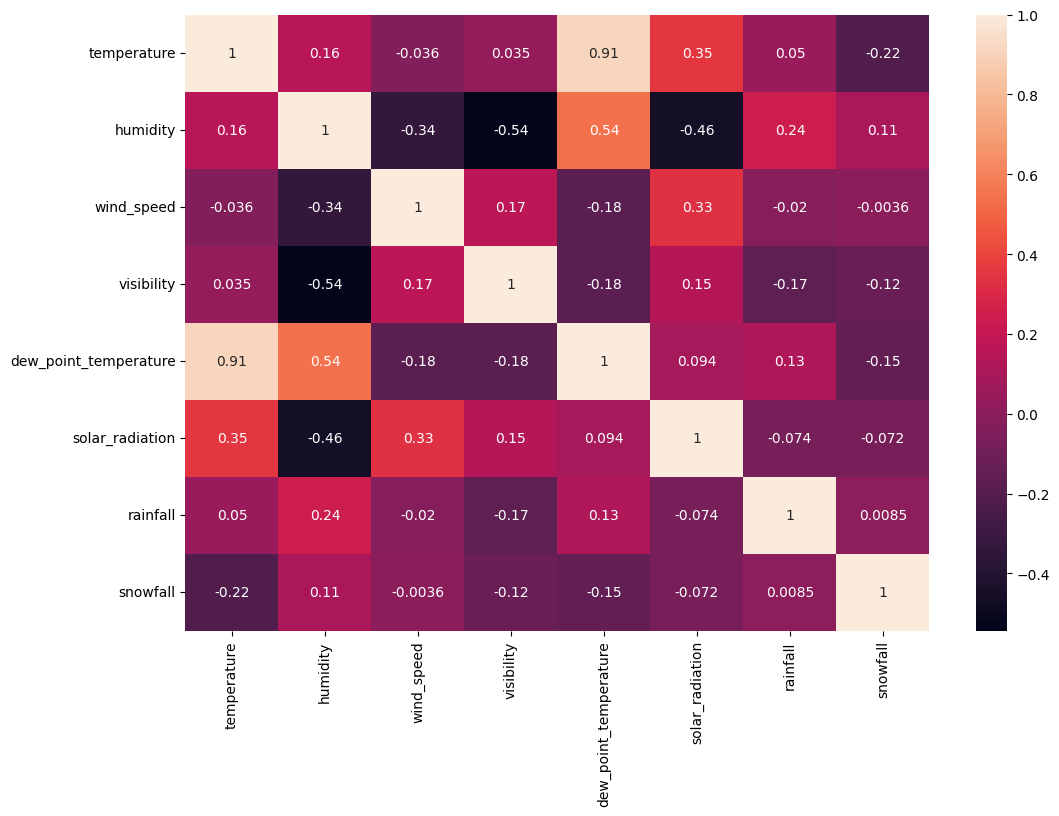

In [153]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[['temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall',
       'snowfall', ]].corr(), annot=True)
plt.show()


#Outliers

##Univarient outliar


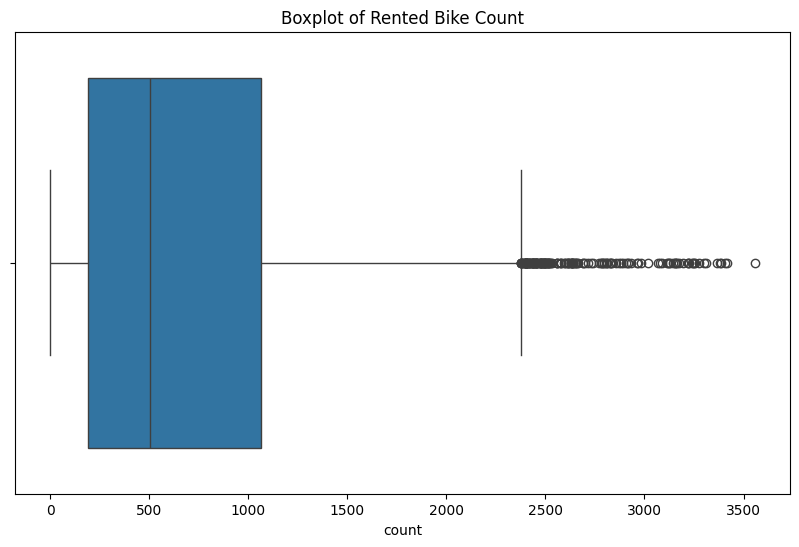

In [154]:
# prompt: draw renetd bike boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x='count', data=df)
plt.title('Boxplot of Rented Bike Count')
plt.show()

In [155]:
# Filter the dataset to show only rows where 'Rented Bike Count' is an outlier
rented_bikes_above_3400 = df[df['count'] > 3400]
rented_bikes_above_3400

date  count  hour  temperature  humidity  wind_speed  visibility  \
4650 2018-06-12   3404    18         24.9        53         3.6        2000   
4818 2018-06-19   3556    18         24.1        57         2.9        1301   
4866 2018-06-21   3418    18         27.8        43         3.0        1933   

      dew_point_temperature  solar_radiation  rainfall  snowfall  season  \
4650                   14.6             1.28       0.0       0.0  Summer   
4818                   15.0             0.56       0.0       0.0  Summer   
4866                   14.0             1.35       0.0       0.0  Summer   

         holiday workingday  day  month month_name  year  
4650  No Holiday        Yes   12      6       June  2018  
4818  No Holiday        Yes   19      6       June  2018  
4866  No Holiday        Yes   21      6       June  2018

Only Three outliers but they are very close in range with the highest value, hence will be kept.

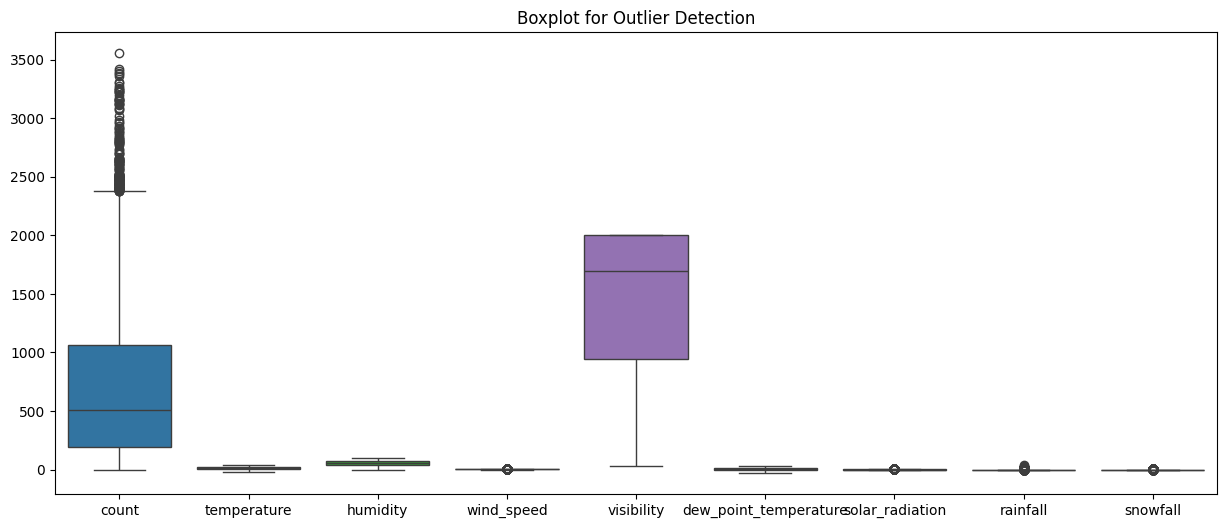

In [156]:
# Visualise outliers

plt.figure(figsize=(15, 6))

# Plot boxplots for key columns
sns.boxplot(data=df[['count', 'temperature', 'humidity', 'wind_speed','visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall',
       'snowfall' ]])
plt.title('Boxplot for Outlier Detection')
plt.show()


##Bivarient Outliers

##Bivariate Outlier detection


<Axes: title={'center': 'Rented Bike Count vs Temperature'}, xlabel='count', ylabel='temperature'>

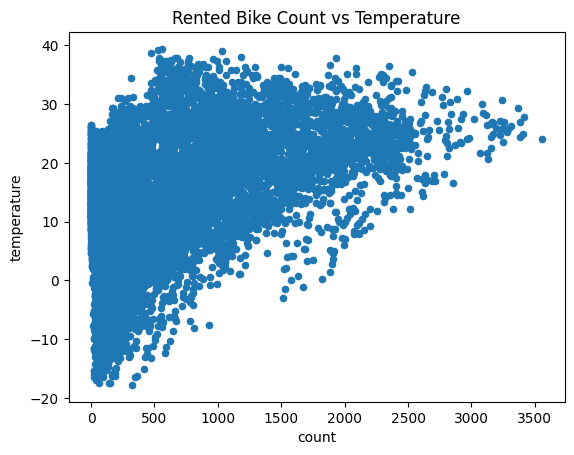

In [157]:

df.plot.scatter(x='count', y='temperature', title='Rented Bike Count vs Temperature')


<Axes: title={'center': 'Rented Bike Count vs Temperature'}, xlabel='count', ylabel='temperature'>

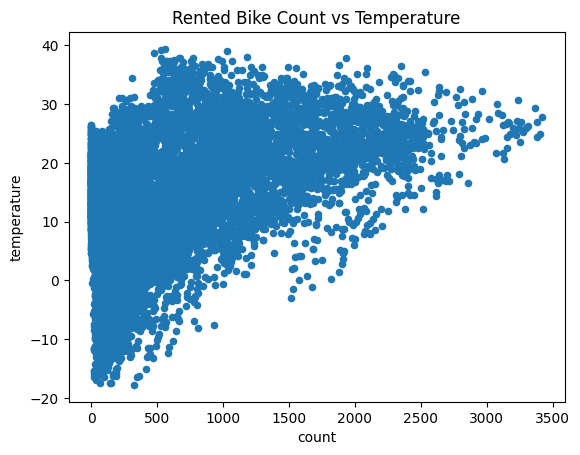

In [158]:
df=df[df['count']<3500]
df.plot.scatter(x='count', y='temperature', title='Rented Bike Count vs Temperature')

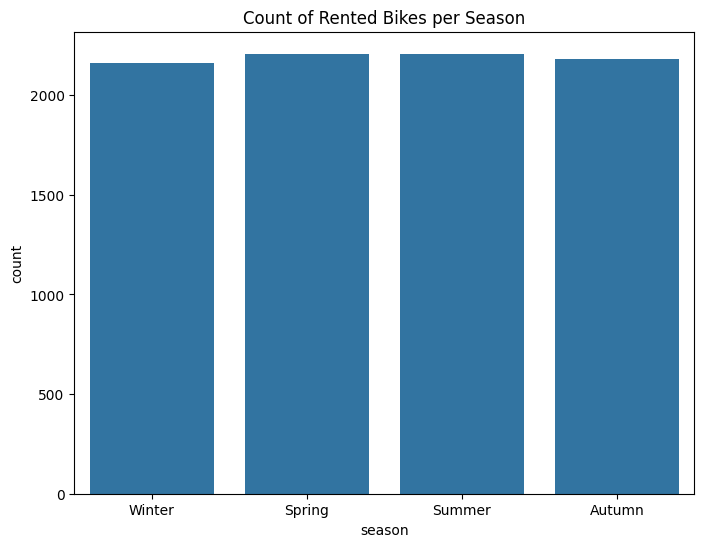

In [159]:
# Barplot for categorical columns like season
plt.figure(figsize=(8, 6))
sns.countplot(x='season', data=df)
plt.title('Count of Rented Bikes per Season')
plt.show()


#Data Cleaning


In [160]:
#Data encording, transform all string values (categorical data) to numerical data
label_encoder = LabelEncoder()
df['season'] = label_encoder.fit_transform(df['season'])
df['holiday'] = label_encoder.fit_transform(df['holiday'])
df['workingday'] = label_encoder.fit_transform(df['workingday'])
df.head(2)

date  count  hour  temperature  humidity  wind_speed  visibility  \
0 2017-12-01    254     0         -5.2        37         2.2        2000   
1 2017-12-01    204     1         -5.5        38         0.8        2000   

   dew_point_temperature  solar_radiation  rainfall  snowfall  season  \
0                  -17.6              0.0       0.0       0.0       3   
1                  -17.6              0.0       0.0       0.0       3   

   holiday  workingday  day  month month_name  year  
0        1           1    1     12   December  2017  
1        1           1    1     12   December  2017

In [161]:
# Create a new 'row_id' column starting from 1

#df = df.reset_index(drop=True)  # Resetting index to ensure it's sequential
#df['row_id'] = df.index + 1
#print(df[['row_id']].head())
#df.head(2)

In [162]:
# At this step drop the columns with string valueIdentify columns with string values (object data type)
columns_to_drop = df.select_dtypes(include=['object']).columns
df = df.drop(columns=columns_to_drop)
print(df.columns)  # Verify the updated column names
df = df.drop(columns=['date'])
df.head(2)



Index(['date', 'count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall',
       'snowfall', 'season', 'holiday', 'workingday', 'day', 'month', 'year'],
      dtype='object')


count  hour  temperature  humidity  wind_speed  visibility  \
0    254     0         -5.2        37         2.2        2000   
1    204     1         -5.5        38         0.8        2000   

   dew_point_temperature  solar_radiation  rainfall  snowfall  season  \
0                  -17.6              0.0       0.0       0.0       3   
1                  -17.6              0.0       0.0       0.0       3   

   holiday  workingday  day  month  year  
0        1           1    1     12  2017  
1        1           1    1     12  2017

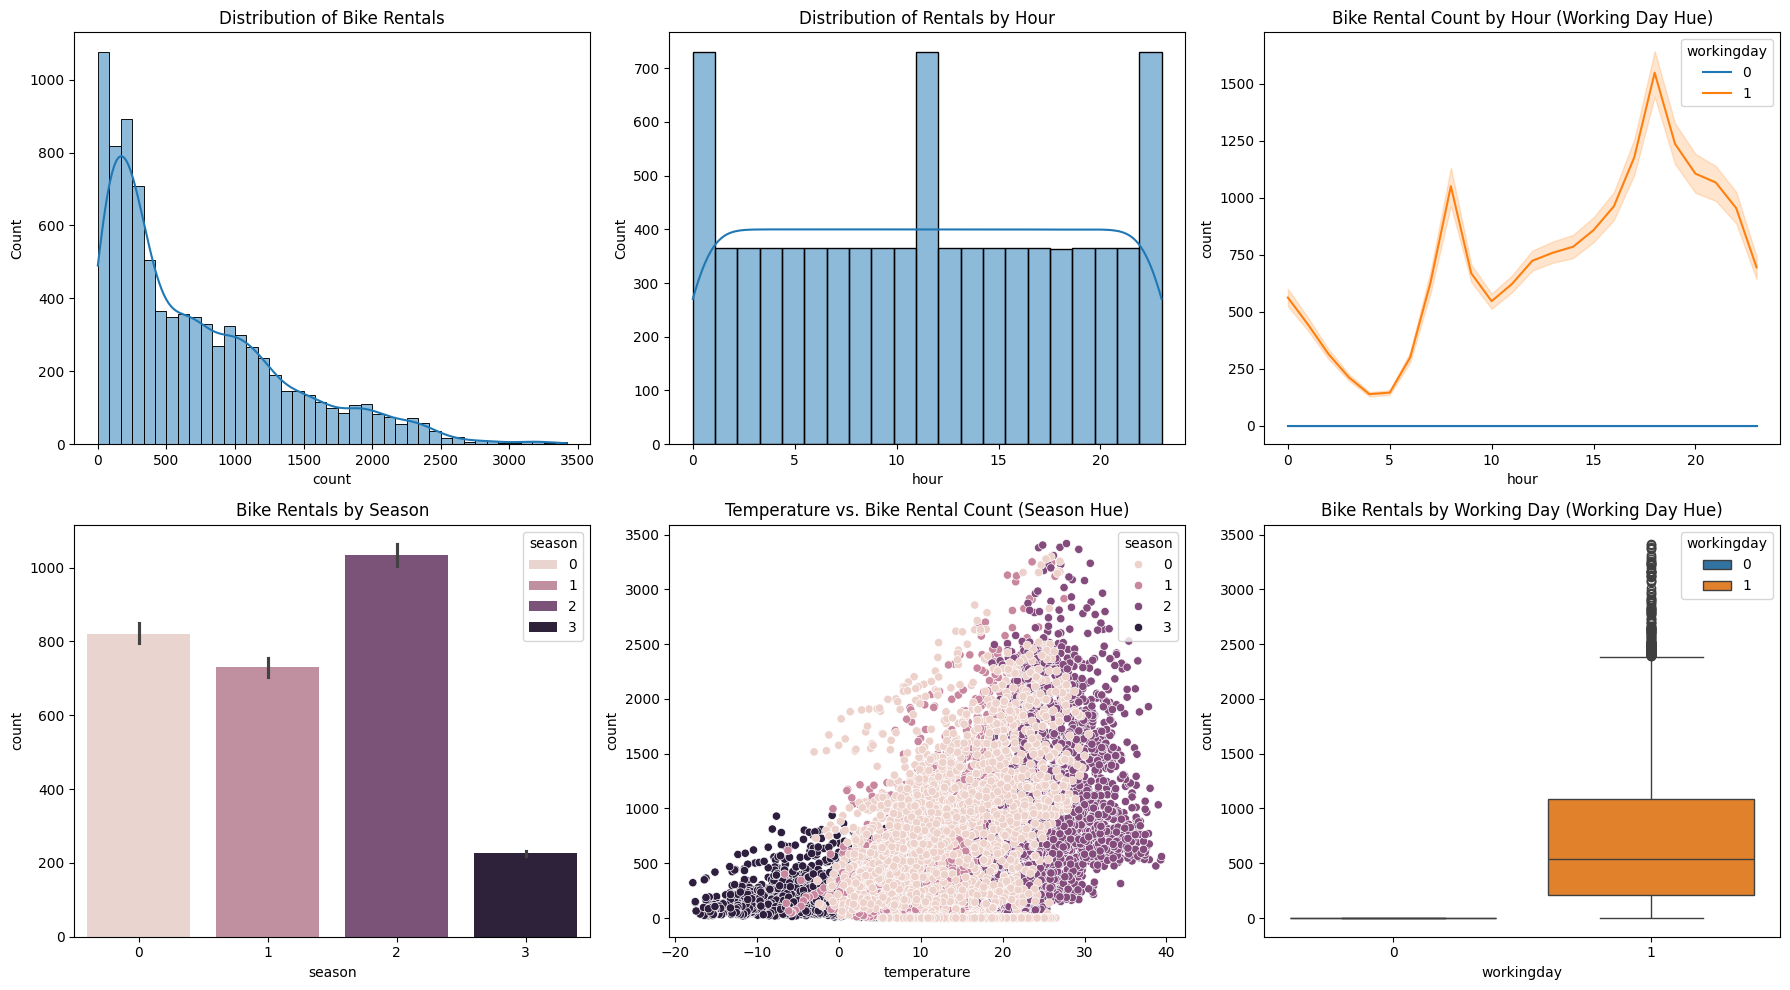

In [163]:
#General Data over view


fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Create a 2x3 grid of subplots

# Histogram for Bike Rental Count
sns.histplot(df['count'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Bike Rentals')

# Histogram for Hour of Day
sns.histplot(df['hour'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Rentals by Hour')

# Line plot of Bike Rental Count by Hour
sns.lineplot(x=df['hour'], y=df['count'], hue=df['workingday'], ax=axes[0, 2])
axes[0, 2].set_title('Bike Rental Count by Hour (Working Day Hue)')

# Bar plot for Count by Season (Hue Season)
sns.barplot(x=df['season'], y=df['count'], hue=df['season'], ax=axes[1, 0])
axes[1, 0].set_title('Bike Rentals by Season')

# Scatter plot of Temperature vs. Bike Rental Count (Hue Season)
sns.scatterplot(x=df['temperature'], y=df['count'], hue=df['season'], ax=axes[1, 1])
axes[1, 1].set_title('Temperature vs. Bike Rental Count (Season Hue)')

#Box plot for Bike Rental Count by Working Day (Add hue for Working Day)
sns.boxplot(x=df['workingday'], y=df['count'], hue=df['workingday'], ax=axes[1, 2])
axes[1, 2].set_title('Bike Rentals by Working Day (Working Day Hue)')

# Adjust layout to make sure labels and titles fit
plt.tight_layout()

# Show plot
plt.show()


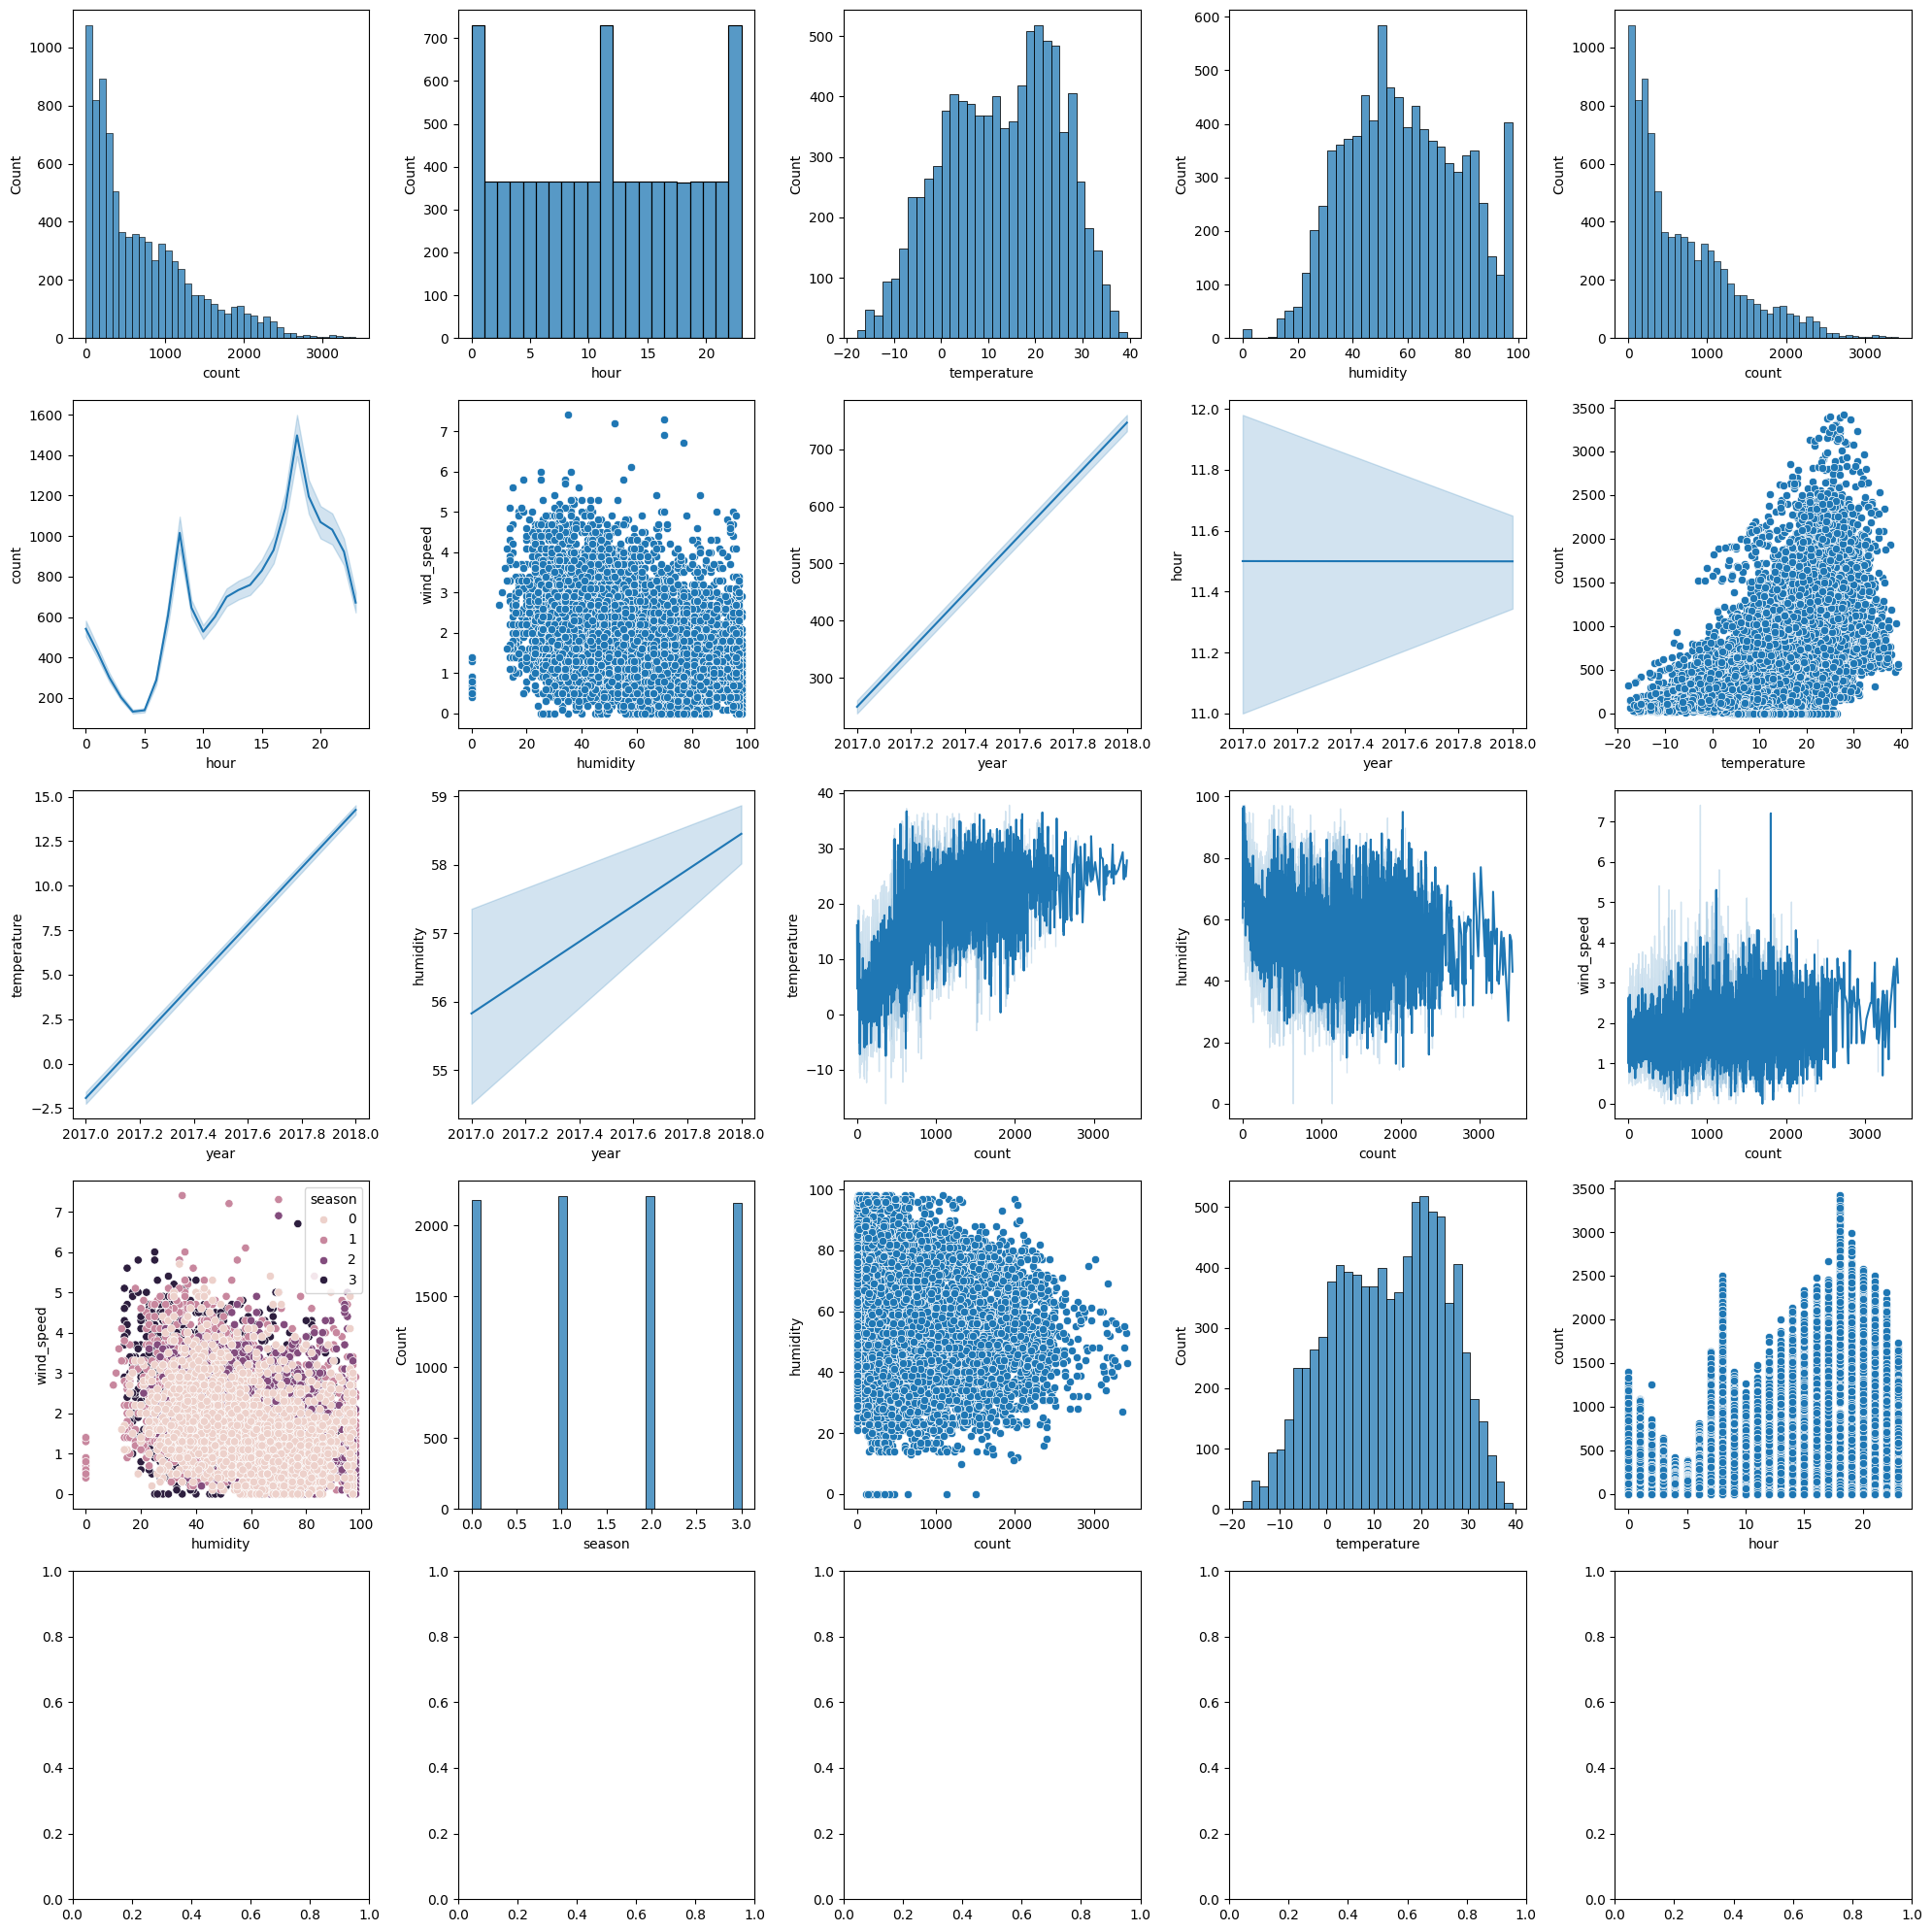

In [164]:


# Set the size of the plot
fig, axes = plt.subplots(5, 5, figsize=(20, 20))  # Create a grid of 5x5 for the plots

# Plotting different graphs into the subplots
sns.histplot(df['count'], ax=axes[0, 0])  # Count distribution
sns.histplot(df['hour'], ax=axes[0, 1])  # Hour distribution
sns.histplot(df['temperature'], ax=axes[0, 2])  # Temperature distribution
sns.histplot(df['humidity'], ax=axes[0, 3])  # Humidity distribution
sns.histplot(df['count'], ax=axes[0, 4])  # Count vs Hour distribution

sns.lineplot(x=df['hour'], y=df['count'], ax=axes[1, 0])  # Bike Rental Count by Hour
sns.scatterplot(x=df['humidity'], y=df['wind_speed'], ax=axes[1, 1])  # Humidity vs Wind Speed
sns.lineplot(x=df['year'], y=df['count'], ax=axes[1, 2])  # Year vs Count
sns.lineplot(x=df['year'], y=df['hour'], ax=axes[1, 3])  # Year vs Hour
sns.scatterplot(x=df['temperature'], y=df['count'], ax=axes[1, 4])  # Temperature vs Count

sns.lineplot(x=df['year'], y=df['temperature'], ax=axes[2, 0])  # Year vs Temperature
sns.lineplot(x=df['year'], y=df['humidity'], ax=axes[2, 1])  # Year vs Humidity
sns.lineplot(x=df['count'], y=df['temperature'], ax=axes[2, 2])  # Count vs Temperature
sns.lineplot(x=df['count'], y=df['humidity'], ax=axes[2, 3])  # Count vs Humidity
sns.lineplot(x=df['count'], y=df['wind_speed'], ax=axes[2, 4])  # Count vs Wind Speed

sns.scatterplot(x=df['humidity'], y=df['wind_speed'], ax=axes[3, 0], hue=df['season'])  # Humidity vs Wind Speed by Season
sns.histplot(df['season'], ax=axes[3, 1])  # Bike Rental Count by Season
sns.scatterplot(x=df['count'], y=df['humidity'], ax=axes[3, 2])  # Count vs Humidity
sns.histplot(df['temperature'], ax=axes[3, 3])  # Temperature distribution
sns.scatterplot(x=df['hour'], y=df['count'], ax=axes[3, 4])  # Count vs Hour

# Adjust layout to make sure labels and titles fit
plt.tight_layout()

# Show the plot
plt.show()


#Visualisation and Comparison

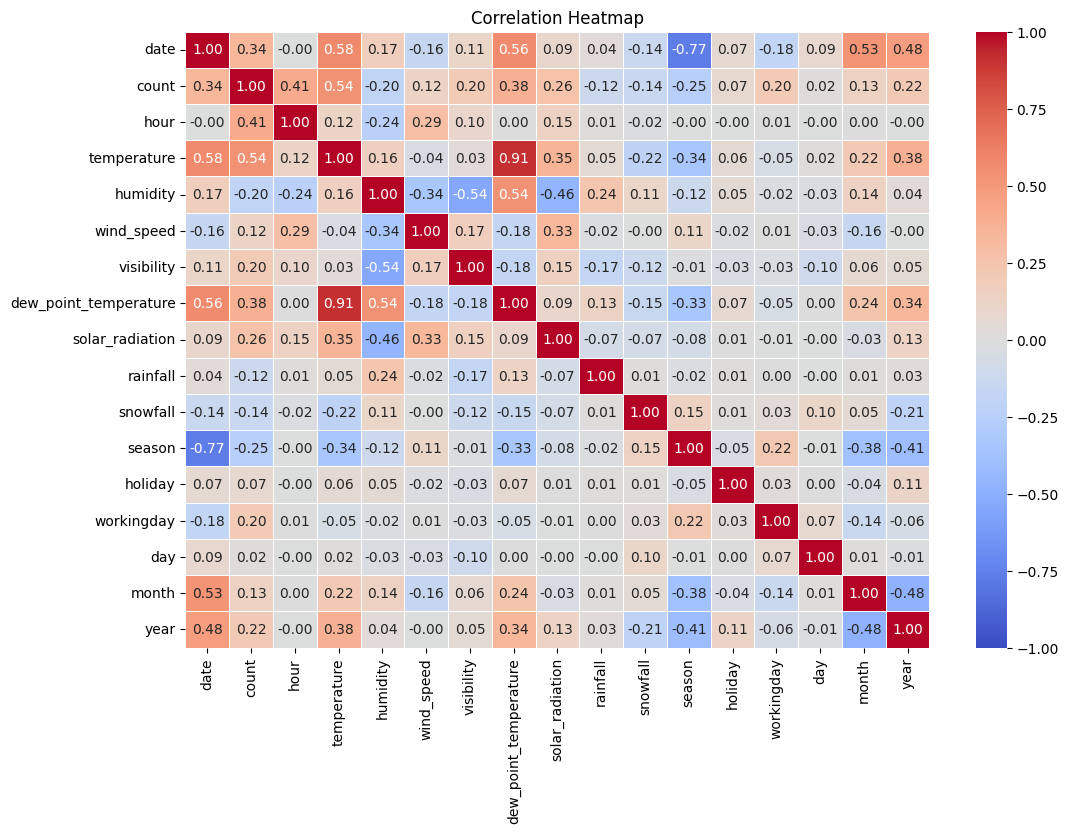

In [27]:
#The correlation matrix for all numerical columns
corr_matrix = df.corr()

# Step 2: Create the heatmap
plt.figure(figsize=(12, 8))  # Set the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation Heatmap')
plt.show()


In [165]:
df.head()

count  hour  temperature  humidity  wind_speed  visibility  \
0    254     0         -5.2        37         2.2        2000   
1    204     1         -5.5        38         0.8        2000   
2    173     2         -6.0        39         1.0        2000   
3    107     3         -6.2        40         0.9        2000   
4     78     4         -6.0        36         2.3        2000   

   dew_point_temperature  solar_radiation  rainfall  snowfall  season  \
0                  -17.6              0.0       0.0       0.0       3   
1                  -17.6              0.0       0.0       0.0       3   
2                  -17.7              0.0       0.0       0.0       3   
3                  -17.6              0.0       0.0       0.0       3   
4                  -18.6              0.0       0.0       0.0       3   

   holiday  workingday  day  month  year  
0        1           1    1     12  2017  
1        1           1    1     12  2017  
2        1           1    1     12  2017  
3        1           1    1     12  2017  
4        1           1    1     12  2017

In [166]:
# Machine Learning Models

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb

# Preprocessing: Encoding Categorical Features and Scaling

# Encode categorical variables like season, workingday, holiday
label_encoder = LabelEncoder()
df['season'] = label_encoder.fit_transform(df['season'])
df['workingday'] = label_encoder.fit_transform(df['workingday'])
df['holiday'] = label_encoder.fit_transform(df['holiday'])

# Split into features (X) and target (y)
X = df.drop(columns=['count'])  # Drop count, date, row_id from features
y = df['count']  # Target variable is 'count' for regression

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for some algorithms like Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Model Selection - Regression Example (Predicting 'count')

# Try Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print(f"Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")
print(f"Linear Regression R2 Score: {r2_score(y_test, y_pred_lr)}")

# Try Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print(f"Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"Random Forest R2 Score: {r2_score(y_test, y_pred_rf)}")

# Try Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
print(f"Gradient Boosting RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gb))}")
print(f"Gradient Boosting R2 Score: {r2_score(y_test, y_pred_gb)}")

# Try XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
print(f"XGBoost RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb))}")
print(f"XGBoost R2 Score: {r2_score(y_test, y_pred_xgb)}")

# Step 3: Classification Example (Predicting 'workingday' as a binary target)
# Use the same features but now predict the binary classification target: 'workingday'

y_class = df['workingday']  # Target variable for classification

# Split the data into training and testing sets (80% train, 20% test)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Standardize the features
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

# Logistic Regression Classifier
lr_class = LogisticRegression()
lr_class.fit(X_train_class_scaled, y_train_class)
y_pred_lr_class = lr_class.predict(X_test_class_scaled)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test_class, y_pred_lr_class)}")
print(f"Logistic Regression Classification Report: \n{classification_report(y_test_class, y_pred_lr_class)}")

# Random Forest Classifier
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class.fit(X_train_class_scaled, y_train_class)
y_pred_rf_class = rf_class.predict(X_test_class_scaled)
print(f"Random Forest Accuracy: {accuracy_score(y_test_class, y_pred_rf_class)}")
print(f"Random Forest Classification Report: \n{classification_report(y_test_class, y_pred_rf_class)}")

# Gradient Boosting Classifier
gb_class = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_class.fit(X_train_class_scaled, y_train_class)
y_pred_gb_class = gb_class.predict(X_test_class_scaled)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test_class, y_pred_gb_class)}")
print(f"Gradient Boosting Classification Report: \n{classification_report(y_test_class, y_pred_gb_class)}")

# XGBoost Classifier
xgb_class = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_class.fit(X_train_class_scaled, y_train_class)
y_pred_xgb_class = xgb_class.predict(X_test_class_scaled)
print(f"XGBoost Accuracy: {accuracy_score(y_test_class, y_pred_xgb_class)}")
print(f"XGBoost Classification Report: \n{classification_report(y_test_class, y_pred_xgb_class)}")


Linear Regression RMSE: 442.71146282569424
Linear Regression R2 Score: 0.5414948859870667
Random Forest RMSE: 233.4964011077069
Random Forest R2 Score: 0.8724551191922747
Gradient Boosting RMSE: 261.1409855375243
Gradient Boosting R2 Score: 0.8404661935306514
XGBoost RMSE: 219.2830627237565
XGBoost R2 Score: 0.8875102996826172
Logistic Regression Accuracy: 1.0
Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00      1694

    accuracy                           1.00      1752
   macro avg       1.00      1.00      1.00      1752
weighted avg       1.00      1.00      1.00      1752

Random Forest Accuracy: 1.0
Random Forest Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00      1694

    accuracy                        

## Ml




In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np


# Train a simple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MAE: {lr_mae}, MSE: {lr_mse}, R²: {lr_r2}')


Linear Regression - MAE: 330.2815715566544, MSE: 195993.43931726608, R²: 0.5414948859870667


In [167]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# data (X, y) is defined above

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a simple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions on training data
y_pred_train_lr = lr_model.predict(X_train_scaled)

# Make predictions on test data
y_pred_test_lr = lr_model.predict(X_test_scaled)

# Evaluate the model on training data
lr_train_mae = mean_absolute_error(y_train, y_pred_train_lr)
lr_train_mse = mean_squared_error(y_train, y_pred_train_lr)
lr_train_r2 = r2_score(y_train, y_pred_train_lr)

# Evaluate the model on test data (validation data)
lr_test_mae = mean_absolute_error(y_test, y_pred_test_lr)
lr_test_mse = mean_squared_error(y_test, y_pred_test_lr)
lr_test_r2 = r2_score(y_test, y_pred_test_lr)

# Print results
print(f'Linear Regression - Training Results:')
print(f'MAE: {lr_train_mae}, MSE: {lr_train_mse}, R²: {lr_train_r2}\n')

print(f'Linear Regression - Test Results:')
print(f'MAE: {lr_test_mae}, MSE: {lr_test_mse}, R²: {lr_test_r2}')


Linear Regression - Training Results:
MAE: 319.48857918315116, MSE: 184331.91079980254, R²: 0.5525563400501596

Linear Regression - Test Results:
MAE: 330.2815715566544, MSE: 195993.43931726608, R²: 0.5414948859870667


In [168]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming you already have your data (X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on training data
y_pred_train_rf = rf_model.predict(X_train_scaled)

# Make predictions on test data
y_pred_test_rf = rf_model.predict(X_test_scaled)

# Evaluate the model on training data
rf_train_mae = mean_absolute_error(y_train, y_pred_train_rf)
rf_train_mse = mean_squared_error(y_train, y_pred_train_rf)
rf_train_rmse = np.sqrt(rf_train_mse)  # RMSE for training
rf_train_r2 = r2_score(y_train, y_pred_train_rf)

# Evaluate the model on test data (validation data)
rf_test_mae = mean_absolute_error(y_test, y_pred_test_rf)
rf_test_mse = mean_squared_error(y_test, y_pred_test_rf)
rf_test_rmse = np.sqrt(rf_test_mse)  # RMSE for test
rf_test_r2 = r2_score(y_test, y_pred_test_rf)

# Print results
print(f'Random Forest - Training Results:')
print(f'MAE: {rf_train_mae}, MSE: {rf_train_mse}, RMSE: {rf_train_rmse}, R²: {rf_train_r2}\n')

print(f'Random Forest - Test Results:')
print(f'MAE: {rf_test_mae}, MSE: {rf_test_mse}, RMSE: {rf_test_rmse}, R²: {rf_test_r2}')


Random Forest - Training Results:
MAE: 48.851417154274294, MSE: 6853.870674211503, RMSE: 82.78810708194446, R²: 0.9833630489371818

Random Forest - Test Results:
MAE: 140.33752283105022, MSE: 54520.56933025114, RMSE: 233.4964011077069, R²: 0.8724551191922747


In [76]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting - MAE: {gb_mae}, MSE: {gb_mse}, R²: {gb_r2}')


Gradient Boosting - MAE: 172.92863295261782, MSE: 68194.61432750945, R²: 0.8404661935306514


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming you already have your data (X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions on training data
y_pred_train_gb = gb_model.predict(X_train_scaled)

# Make predictions on test data
y_pred_test_gb = gb_model.predict(X_test_scaled)

# Evaluate the model on training data
gb_train_mae = mean_absolute_error(y_train, y_pred_train_gb)
gb_train_mse = mean_squared_error(y_train, y_pred_train_gb)
gb_train_rmse = np.sqrt(gb_train_mse)  # RMSE for training
gb_train_r2 = r2_score(y_train, y_pred_train_gb)

# Evaluate the model on test data (validation data)
gb_test_mae = mean_absolute_error(y_test, y_pred_test_gb)
gb_test_mse = mean_squared_error(y_test, y_pred_test_gb)
gb_test_rmse = np.sqrt(gb_test_mse)  # RMSE for test
gb_test_r2 = r2_score(y_test, y_pred_test_gb)

# Print results
print(f'Gradient Boosting - Training Results:')
print(f'MAE: {gb_train_mae}, MSE: {gb_train_mse}, RMSE: {gb_train_rmse}, R²: {gb_train_r2}\n')

print(f'Gradient Boosting - Test Results:')
print(f'MAE: {gb_test_mae}, MSE: {gb_test_mse}, RMSE: {gb_test_rmse}, R²: {gb_test_r2}')


Gradient Boosting - Training Results:
MAE: 160.6890028800601, MSE: 57157.77208419566, RMSE: 239.0769166695013, R²: 0.8612563466360014

Gradient Boosting - Test Results:
MAE: 172.92863295261782, MSE: 68194.61432750945, RMSE: 261.1409855375243, R²: 0.8404661935306514


In [78]:
# K Neighbors Regressor
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  #tune n_neighbors
knn_model.fit(X_train, y_train)

# Predictions
y_pred = knn_model.predict(X_test)

# Evaluation
knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
knn_r2 = r2_score(y_test, y_pred)

# Print Results
print(f"KNN RMSE: {knn_rmse}")
print(f"KNN R² Score: {knn_r2}")

# Optional: Tune the number of neighbors (k) using a loop or grid search


KNN RMSE: 438.8188863821407
KNN R² Score: 0.5495223259991362


## Summary Graph

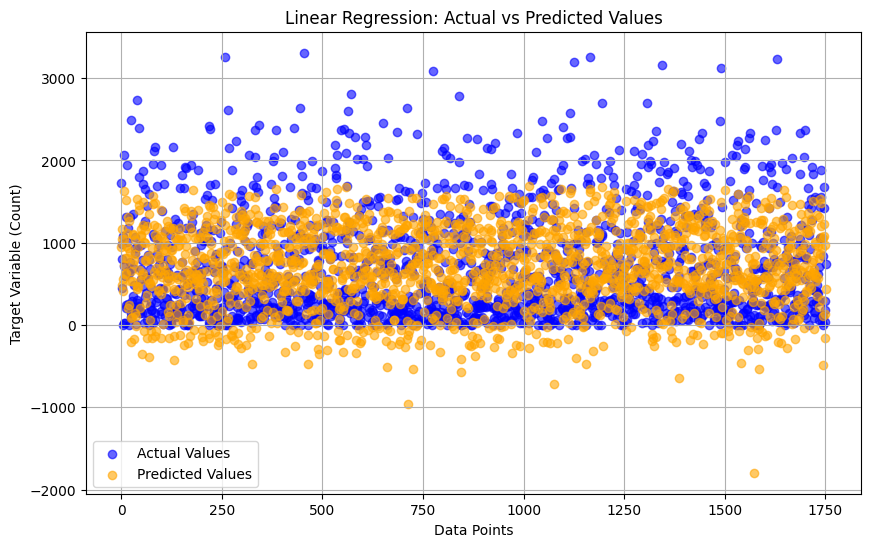

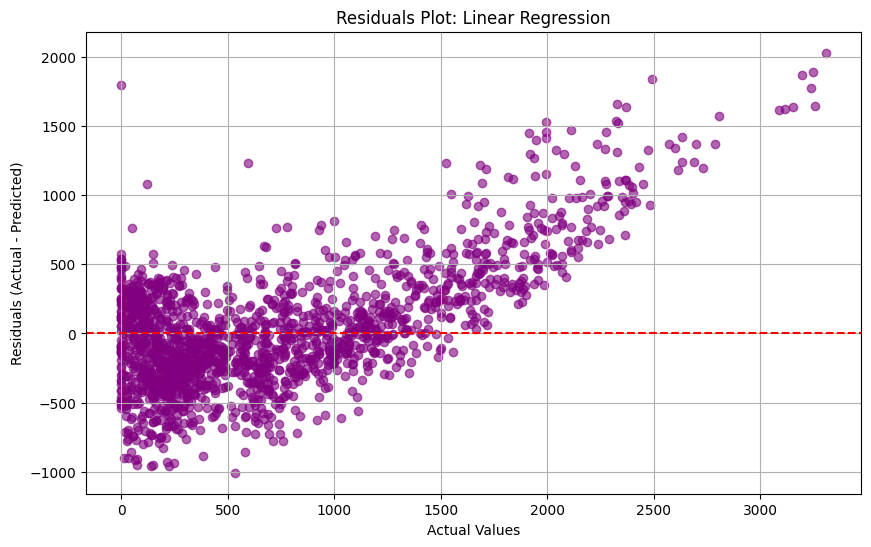

In [170]:
#Linear regression model graph
linear_regression_model = LinearRegression()

# Fit the model on the training data
linear_regression_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_regression_model.predict(X_test)

# Visualize Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual Values", alpha=0.6, color='blue')
plt.scatter(range(len(y_pred)), y_pred, label="Predicted Values", alpha=0.6, color='orange')
plt.title("Linear Regression: Actual vs Predicted Values")
plt.xlabel("Data Points")
plt.ylabel("Target Variable (Count)")
plt.legend()
plt.grid()
plt.show()

# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Plot: Linear Regression")
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid()
plt.show()



In [99]:
# Ensure all features are numeric
# Check if there are any datetime or non-numeric columns
print(X_train.dtypes)

# Drop datetime columns if they exist (example below assumes a column 'date' exists)
if 'date' in X_train.columns:
    X_train = X_train.drop(columns=['date'])
    X_test = X_test.drop(columns=['date'])

# Convert categorical columns to numeric (if needed)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in train and test set (to handle dummy variable mismatch)
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)  # Fill missing dummy variables in test set with 0

date                     datetime64[ns]
hour                              int64
temperature                     float64
humidity                          int64
wind_speed                      float64
visibility                        int64
dew_point_temperature           float64
solar_radiation                 float64
rainfall                        float64
snowfall                        float64
season                            int64
holiday                           int64
workingday                        int64
day                            category
month                             int32
month_name                       object
year                              int32
dtype: object


In [94]:
# Import Linear regression model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print evaluation metrics
print("Linear Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R-Squared (R²): {r2_lr:.2f}")


Linear Regression Evaluation:
Mean Squared Error (MSE): 177917.47
Mean Absolute Error (MAE): 316.19
Root Mean Squared Error (RMSE): 421.80
R-Squared (R²): 0.57


In [95]:
# Import necessary library
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print("Random Forest Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-Squared (R²): {r2_rf:.2f}")


Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 53435.28
Mean Absolute Error (MAE): 138.26
Root Mean Squared Error (RMSE): 231.16
R-Squared (R²): 0.87


In [97]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print evaluation metrics
print("Gradient Boosting Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.2f}")
print(f"R-Squared (R²): {r2_gb:.2f}")


Gradient Boosting Regressor Evaluation:
Mean Squared Error (MSE): 67970.67
Mean Absolute Error (MAE): 168.17
Root Mean Squared Error (RMSE): 260.71
R-Squared (R²): 0.84


In [186]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Assuming you already have your data (X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a simple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions on training data
y_pred_train_lr = lr_model.predict(X_train_scaled)

# Make predictions on test data
y_pred_test_lr = lr_model.predict(X_test_scaled)

# Evaluate the model on training data
lr_train_mae = mean_absolute_error(y_train, y_pred_train_lr)
lr_train_mse = mean_squared_error(y_train, y_pred_train_lr)
lr_train_rmse = np.sqrt(lr_train_mse)
lr_train_r2 = r2_score(y_train, y_pred_train_lr)

# Evaluate the model on test data (validation data)
lr_test_mae = mean_absolute_error(y_test, y_pred_test_lr)
lr_test_mse = mean_squared_error(y_test, y_pred_test_lr)
lr_test_rmse = np.sqrt(lr_test_mse)
lr_test_r2 = r2_score(y_test, y_pred_test_lr)

# Print results
print(f'Linear Regression - Training Results:')
print(f'MAE: {lr_train_mae}, MSE: {lr_train_mse}, RMSE: {lr_train_rmse}, R²: {lr_train_r2}\n')

print(f'Linear Regression - Test Results:')
print(f'MAE: {lr_test_mae}, MSE: {lr_test_mse},RMSE: {lr_test_rmse}, R²: {lr_test_r2}')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming you already have your data (X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on training data
y_pred_train_rf = rf_model.predict(X_train_scaled)

# Make predictions on test data
y_pred_test_rf = rf_model.predict(X_test_scaled)

# Evaluate the model on training data
rf_train_mae = mean_absolute_error(y_train, y_pred_train_rf)
rf_train_mse = mean_squared_error(y_train, y_pred_train_rf)
rf_train_rmse = np.sqrt(rf_train_mse)  # RMSE for training
rf_train_r2 = r2_score(y_train, y_pred_train_rf)

# Evaluate the model on test data (validation data)
rf_test_mae = mean_absolute_error(y_test, y_pred_test_rf)
rf_test_mse = mean_squared_error(y_test, y_pred_test_rf)
rf_test_rmse = np.sqrt(rf_test_mse)  # RMSE for test
rf_test_r2 = r2_score(y_test, y_pred_test_rf)

# Print results
print(f'Random Forest - Training Results:')
print(f'MAE: {rf_train_mae}, MSE: {rf_train_mse}, RMSE: {rf_train_rmse}, R²: {rf_train_r2}\n')

print(f'Random Forest - Test Results:')
print(f'MAE: {rf_test_mae}, MSE: {rf_test_mse}, RMSE: {rf_test_rmse}, R²: {rf_test_r2}')
(print(""))


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming you already have your data (X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions on training data
y_pred_train_gb = gb_model.predict(X_train_scaled)

# Make predictions on test data
y_pred_test_gb = gb_model.predict(X_test_scaled)

# Evaluate the model on training data
gb_train_mae = mean_absolute_error(y_train, y_pred_train_gb)
gb_train_mse = mean_squared_error(y_train, y_pred_train_gb)
gb_train_rmse = np.sqrt(gb_train_mse)  # RMSE for training
gb_train_r2 = r2_score(y_train, y_pred_train_gb)

# Evaluate the model on test data (validation data)
gb_test_mae = mean_absolute_error(y_test, y_pred_test_gb)
gb_test_mse = mean_squared_error(y_test, y_pred_test_gb)
gb_test_rmse = np.sqrt(gb_test_mse)  # RMSE for test
gb_test_r2 = r2_score(y_test, y_pred_test_gb)

# Print results
print(f'Gradient Boosting - Training Results:')
print(f'MAE: {gb_train_mae}, MSE: {gb_train_mse}, RMSE: {gb_train_rmse}, R²: {gb_train_r2}\n')

print(f'Gradient Boosting - Test Results:')
print(f'MAE: {gb_test_mae}, MSE: {gb_test_mse}, RMSE: {gb_test_rmse}, R²: {gb_test_r2}')



from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train a K-Nearest Neighbors Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)  # Number of neighbors can be tuned
knn_model.fit(X_train_scaled, y_train)

# Make predictions on training data
y_pred_train_knn = knn_model.predict(X_train_scaled)

# Make predictions on test data
y_pred_test_knn = knn_model.predict(X_test_scaled)

# Evaluate the model on training data
knn_train_mae = mean_absolute_error(y_train, y_pred_train_knn)
knn_train_mse = mean_squared_error(y_train, y_pred_train_knn)
knn_train_rmse = np.sqrt(knn_train_mse)  # RMSE for training
knn_train_r2 = r2_score(y_train, y_pred_train_knn)

# Evaluate the model on test data (validation data)
knn_test_mae = mean_absolute_error(y_test, y_pred_test_knn)
knn_test_mse = mean_squared_error(y_test, y_pred_test_knn)
knn_test_rmse = np.sqrt(knn_test_mse)  # RMSE for test
knn_test_r2 = r2_score(y_test, y_pred_test_knn)

# Print results


print(f'KNN Regression - Training Results:')
print(f'MAE: {knn_train_mae}, MSE: {knn_train_mse}, RMSE: {knn_train_rmse}, R²: {knn_train_r2}\n')

print(f'KNN Regression - Test Results:')
print(f'MAE: {knn_test_mae}, MSE: {knn_test_mse}, RMSE: {knn_test_rmse}, R²: {knn_test_r2}')


Linear Regression - Training Results:
MAE: 319.48857918315116, MSE: 184331.91079980254, RMSE: 429.3389229965093, R²: 0.5525563400501596

Linear Regression - Test Results:
MAE: 330.2815715566544, MSE: 195993.43931726608,RMSE: 442.71146282569424, R²: 0.5414948859870667
Random Forest - Training Results:
MAE: 48.851417154274294, MSE: 6853.870674211503, RMSE: 82.78810708194446, R²: 0.9833630489371818

Random Forest - Test Results:
MAE: 140.33752283105022, MSE: 54520.56933025114, RMSE: 233.4964011077069, R²: 0.8724551191922747

Gradient Boosting - Training Results:
MAE: 160.6890028800601, MSE: 57157.77208419566, RMSE: 239.0769166695013, R²: 0.8612563466360014

Gradient Boosting - Test Results:
MAE: 172.92863295261782, MSE: 68194.61432750945, RMSE: 261.1409855375243, R²: 0.8404661935306514
KNN Regression - Training Results:
MAE: 148.51628371628374, MSE: 56847.48027972028, RMSE: 238.42709636222196, R²: 0.8620095428679749

KNN Regression - Test Results:
MAE: 195.53744292237442, MSE: 95711.84159

In [177]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train a Support Vector Regressor (SVR) model
svr_model = SVR(kernel='rbf')  # You can try 'linear', 'poly', etc.
svr_model.fit(X_train_scaled, y_train)

# Make predictions on training data
y_pred_train_svr = svr_model.predict(X_train_scaled)

# Make predictions on test data
y_pred_test_svr = svr_model.predict(X_test_scaled)

# Evaluate the model on training data
svr_train_mae = mean_absolute_error(y_train, y_pred_train_svr)
svr_train_mse = mean_squared_error(y_train, y_pred_train_svr)
svr_train_rmse = np.sqrt(svr_train_mse)  # RMSE for training
svr_train_r2 = r2_score(y_train, y_pred_train_svr)

# Evaluate the model on test data (validation data)
svr_test_mae = mean_absolute_error(y_test, y_pred_test_svr)
svr_test_mse = mean_squared_error(y_test, y_pred_test_svr)
svr_test_rmse = np.sqrt(svr_test_mse)  # RMSE for test
svr_test_r2 = r2_score(y_test, y_pred_test_svr)

# Print results
print(f'Support Vector Regression - Training Results:')
print(f'MAE: {svr_train_mae}, MSE: {svr_train_mse}, RMSE: {svr_train_rmse}, R²: {svr_train_r2}\n')

print(f'Support Vector Regression - Test Results:')
print(f'MAE: {svr_test_mae}, MSE: {svr_test_mse}, RMSE: {svr_test_rmse}, R²: {svr_test_r2}')


from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train an ElasticNet regression model
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # alpha and l1_ratio are tunable
elasticnet_model.fit(X_train_scaled, y_train)

# Make predictions on training data
y_pred_train_en = elasticnet_model.predict(X_train_scaled)

# Make predictions on test data
y_pred_test_en = elasticnet_model.predict(X_test_scaled)

# Evaluate the model on training data
en_train_mae = mean_absolute_error(y_train, y_pred_train_en)
en_train_mse = mean_squared_error(y_train, y_pred_train_en)
en_train_rmse = np.sqrt(en_train_mse)  # RMSE for training
en_train_r2 = r2_score(y_train, y_pred_train_en)

# Evaluate the model on test data (validation data)
en_test_mae = mean_absolute_error(y_test, y_pred_test_en)
en_test_mse = mean_squared_error(y_test, y_pred_test_en)
en_test_rmse = np.sqrt(en_test_mse)  # RMSE for test
en_test_r2 = r2_score(y_test, y_pred_test_en)

# Print results
print(f'ElasticNet - Training Results:')
print(f'MAE: {en_train_mae}, MSE: {en_train_mse}, RMSE: {en_train_rmse}, R²: {en_train_r2}\n')

print(f'ElasticNet - Test Results:')
print(f'MAE: {en_test_mae}, MSE: {en_test_mse}, RMSE: {en_test_rmse}, R²: {en_test_r2}')

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on training data
y_pred_train_ridge = ridge_model.predict(X_train_scaled)

# Make predictions on test data
y_pred_test_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the model on training data
ridge_train_mae = mean_absolute_error(y_train, y_pred_train_ridge)
ridge_train_mse = mean_squared_error(y_train, y_pred_train_ridge)
ridge_train_rmse = np.sqrt(ridge_train_mse)  # RMSE for training
ridge_train_r2 = r2_score(y_train, y_pred_train_ridge)

# Evaluate the model on test data (validation data)
ridge_test_mae = mean_absolute_error(y_test, y_pred_test_ridge)
ridge_test_mse = mean_squared_error(y_test, y_pred_test_ridge)
ridge_test_rmse = np.sqrt(ridge_test_mse)  # RMSE for test
ridge_test_r2 = r2_score(y_test, y_pred_test_ridge)

# Print results
print("")
print(f'Ridge Regression - Training Results:')
print(f'MAE: {ridge_train_mae}, MSE: {ridge_train_mse}, RMSE: {ridge_train_rmse}, R²: {ridge_train_r2}\n')

print(f'Ridge Regression - Test Results:')
print(f'MAE: {ridge_test_mae}, MSE: {ridge_test_mse}, RMSE: {ridge_test_rmse}, R²: {ridge_test_r2}')


Support Vector Regression - Training Results:
MAE: 341.0428482446048, MSE: 261494.39179230444, RMSE: 511.3652234873862, R²: 0.36525364917970826

Support Vector Regression - Test Results:
MAE: 350.8249720446517, MSE: 279568.14285687706, RMSE: 528.7420381025865, R²: 0.3459810508887575
ElasticNet - Training Results:
MAE: 328.69203149100326, MSE: 204562.0640824334, RMSE: 452.2853790279246, R²: 0.5034500632972561

ElasticNet - Test Results:
MAE: 336.5981752451996, MSE: 215296.78439568926, RMSE: 464.0008452532056, R²: 0.49633683137644125
Ridge Regression - Training Results:
MAE: 319.4843466731569, MSE: 184331.92236171025, RMSE: 429.3389364612884, R²: 0.552556311985012

Ridge Regression - Test Results:
MAE: 330.2756284816665, MSE: 195994.38199667094, RMSE: 442.7125274900982, R²: 0.5414926806921879


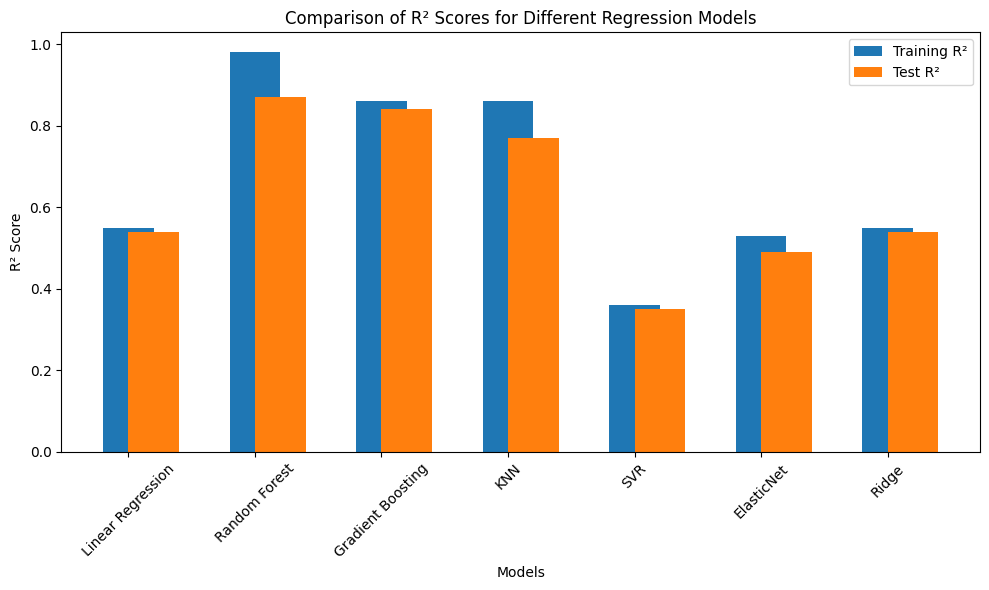

In [183]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Random Forest', 'Gradient Boosting','KNN', 'SVR', 'ElasticNet',  'Ridge']
train_r2 = [0.55, 0.98, 0.86,  0.86, 0.36, 0.53,0.55]
test_r2 =  [0.54, 0.87, 0.84,  0.77, 0.35, 0.49,0.54]

x = range(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x, train_r2, width=0.4, label='Training R²', align='center')
plt.bar(x, test_r2, width=0.4, label='Test R²', align='edge')

plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Comparison of R² Scores for Different Regression Models')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


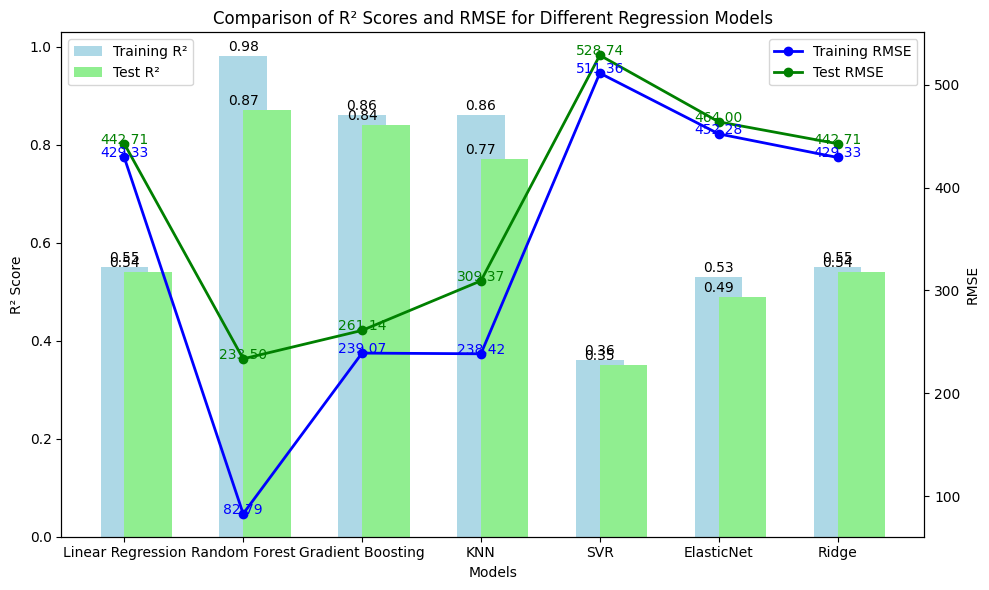

In [188]:
import matplotlib.pyplot as plt

# Data for models
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting','KNN', 'SVR', 'ElasticNet',  'Ridge']
train_r2 = [0.55, 0.98, 0.86,  0.86, 0.36, 0.53,0.55]
test_r2 =  [0.54, 0.87, 0.84,  0.77, 0.35, 0.49,0.54]
train_rmse = [429.33, 82.788, 239.07, 238.42, 511.36, 452.28, 429.33]
test_rmse =  [442.71, 233.496, 261.14, 309.37, 528.74, 464.00, 442.71]

x = range(len(models))

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the bar graph for R²
ax1.bar(x, train_r2, width=0.4, label='Training R²', align='center', color='lightblue')
ax1.bar(x, test_r2, width=0.4, label='Test R²', align='edge', color='lightgreen')

# Adding labels and title for R²
ax1.set_xlabel('Models')
ax1.set_ylabel('R² Score')
ax1.set_title('Comparison of R² Scores and RMSE for Different Regression Models')

# Adding R² text labels on bars
for i in range(len(models)):
    ax1.text(i, train_r2[i] + 0.01, f'{train_r2[i]:.2f}', ha='center', color='black')
    ax1.text(i, test_r2[i] + 0.01, f'{test_r2[i]:.2f}', ha='center', color='black')

# Create a second axis to plot RMSE
ax2 = ax1.twinx()

# Plotting the line graph for RMSE
ax2.plot(x, train_rmse, label='Training RMSE', marker='o', color='blue', linestyle='-', linewidth=2)
ax2.plot(x, test_rmse, label='Test RMSE', marker='o', color='green', linestyle='-', linewidth=2)

# Adding labels for RMSE
ax2.set_ylabel('RMSE', color='black')

# Adding RMSE text labels on lines
for i in range(len(models)):
    ax2.text(i, train_rmse[i] + 0.2, f'{train_rmse[i]:.2f}', ha='center', color='blue')
    ax2.text(i, test_rmse[i] + 0.2, f'{test_rmse[i]:.2f}', ha='center', color='green')

# Display the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust layout for better spacing
plt.xticks(x, models, rotation=45)
plt.tight_layout()
plt.show()


#LIME AND SHAP


In [190]:
import lime
import lime.lime_tabular
import shap
from sklearn.ensemble import RandomForestRegressor

# Fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Initialize LIME's TabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    mode='regression',
    training_labels=y_train,
    feature_names=X_train.columns, # Feature names
    discretize_continuous=True
)

# Choose an instance for explanation
i = 10  # Change to any instance index from your test set
exp = explainer.explain_instance(X_test_scaled[i], rf_model.predict)

# Display the explanation
exp.show_in_notebook(show_all=False)



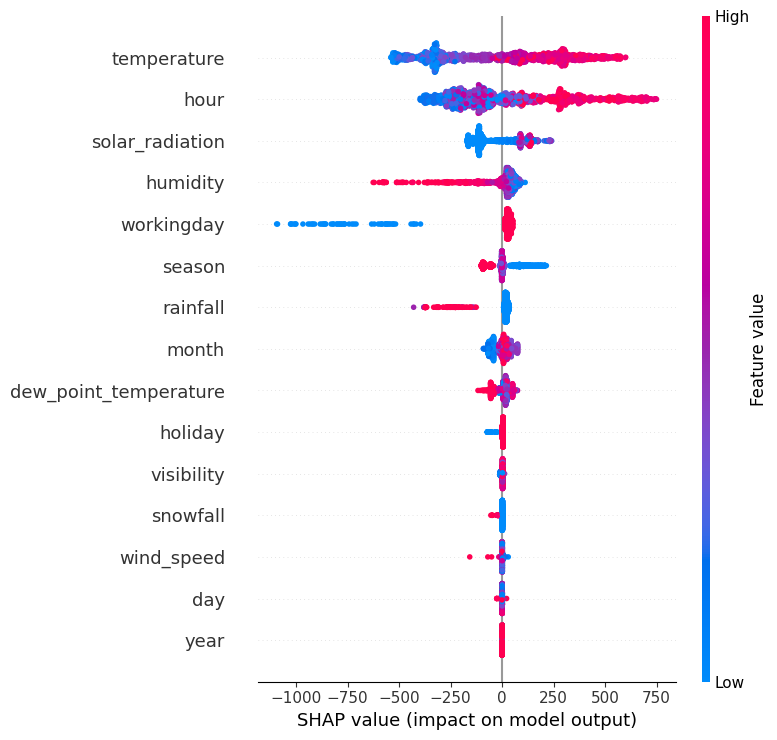

In [193]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# Train a Gradient Boosting Regressor (or any other model)
gb_model = GradientBoostingRegressor(n_estimators=100)
gb_model.fit(X_train_scaled, y_train)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(gb_model)

# SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled)

# Ensure the SHAP values are in the proper format
# If using tree-based models, shap_values should be a list or array, so let's wrap it correctly
shap_values = shap.Explanation(values=shap_values,
                                base_values=explainer.expected_value,
                                data=X_test_scaled_df.values,
                                feature_names=X_test_scaled_df.columns)

# Summary plot (global explanation of feature importance)
shap.summary_plot(shap_values.values, X_test_scaled_df)

# Force plot
shap.initjs()  # Initialize JS for interactive plots
shap.force_plot(shap_values.base_values[0], shap_values.values[0], X_test_scaled_df.iloc[0])


